<a href="https://colab.research.google.com/github/iamBehzad/Five-Project-Advanced-Deep-Learning-Low-Level-Modeling/blob/main/Project03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import time

In [ ]:
class MyLayer(tf.keras.layers.Layer):
    def __init__(self, units=32):
        super(MyLayer, self).__init__()
        self.units = units

    def build(self, input_shape):
        self.v = self.add_weight(shape=(input_shape[-1], self.units),
                                 initializer='random_normal',
                                 trainable=True,
                                 name='v')
        self.w = self.add_weight(shape=(input_shape[-1], self.units),
                                 initializer='random_normal',
                                 trainable=True,
                                 name='w')
        self.b = self.add_weight(shape=(self.units,),
                                 initializer='random_normal',
                                 trainable=True,
                                 name='b')

    def call(self, inputs):
        return  tf.matmul(tf.math.pow(inputs, 3) , self.v) - tf.matmul(inputs, self.w) + self.b

In [ ]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

# Select only images and labels corresponding to classes 0, 2, and 5
keep_classes = np.isin(train_labels, [0, 2, 5])
x_train = train_images[keep_classes]
y_train = train_labels[keep_classes]
y_train[y_train == 0] = 0
y_train[y_train == 2] = 1
y_train[y_train == 5] = 2

keep_classes = np.isin(test_labels, [0, 2, 5])
x_test = test_images[keep_classes]
y_test = test_labels[keep_classes]
y_test[y_test == 0] = 0
y_test[y_test == 2] = 1
y_test[y_test == 5] = 2

# Normalize pixel values
x_train, x_test = x_train/255.0 , x_test/255.0

print("x_train.shape = ", x_train.shape)
print("y_train.shape = ", y_train.shape)
print("x_test.shape = ", x_test.shape)
print("y_test.shape = " , y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
x_train.shape =  (17302, 28, 28)
y_train.shape =  (17302,)
x_test.shape =  (2904, 28, 28)
y_test.shape =  (2904,)


y_train[100] =  1


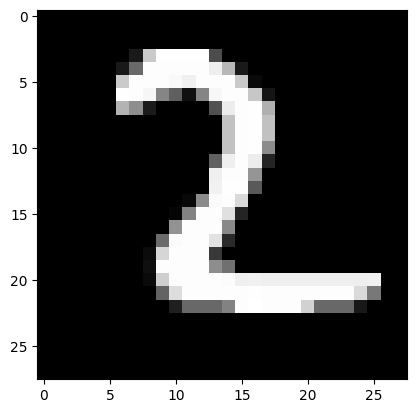

In [ ]:
plt.imshow(x_train[100], cmap="gray")
print("y_train[100] = ", y_train[100])

y_test[100] =  0


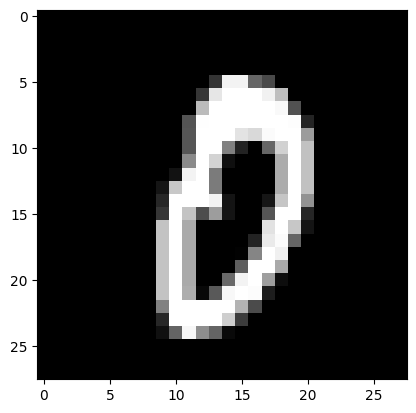

In [ ]:
plt.imshow(x_test[100], cmap="gray")
print("y_test[100] = ", y_test[100])

In [ ]:
model_dense = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28, 28]),
  keras.layers.Dense(50, activation ="relu"),
  keras.layers.Dense(50, activation='relu'),
  keras.layers.Dense(3, activation="softmax")
])

model_dense.compile(loss='sparse_categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

model_dense.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 50)                39250     
                                                                 
 dense_4 (Dense)             (None, 50)                2550      
                                                                 
 dense_5 (Dense)             (None, 3)                 153       
                                                                 
Total params: 41,953
Trainable params: 41,953
Non-trainable params: 0
_________________________________________________________________


In [ ]:
start_time = time.time()
model_dense_history = model_dense.fit(x_train, y_train, batch_size=32 , epochs=50, validation_split=0.1)
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/50
487/487 [==============================] - 4s 5ms/step - loss: 0.1124 - accuracy: 0.9634 - val_loss: 0.0447 - val_accuracy: 0.9856
Epoch 2/50
487/487 [==============================] - 2s 3ms/step - loss: 0.0331 - accuracy: 0.9898 - val_loss: 0.0386 - val_accuracy: 0.9890
Epoch 3/50
487/487 [==============================] - 2s 3ms/step - loss: 0.0178 - accuracy: 0.9940 - val_loss: 0.0257 - val_accuracy: 0.9936
Epoch 4/50
487/487 [==============================] - 3s 7ms/step - loss: 0.0113 - accuracy: 0.9966 - val_loss: 0.0285 - val_accuracy: 0.9931
Epoch 5/50
487/487 [==============================] - 2s 5ms/step - loss: 0.0085 - accuracy: 0.9972 - val_loss: 0.0582 - val_accuracy: 0.9884
Epoch 6/50
487/487 [==============================] - 4s 8ms/step - loss: 0.0072 - accuracy: 0.9974 - val_loss: 0.0447 - val_accuracy: 0.9919
Epoch 7/50
487/487 [==============================] - 2s 4ms/step - loss: 0.0046 - accuracy: 0.9983 - val_loss: 0.0406 - val_accuracy: 0.9925
Epoch 

In [ ]:
model_MyLayer = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    MyLayer(units=50),
    MyLayer(units=50),
    keras.layers.Dense(3, activation='softmax')
])

model_MyLayer.compile(loss='sparse_categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])
model_MyLayer.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 my_layer (MyLayer)          (None, 50)                78450     
                                                                 
 my_layer_1 (MyLayer)        (None, 50)                5050      
                                                                 
 dense_6 (Dense)             (None, 3)                 153       
                                                                 
Total params: 83,653
Trainable params: 83,653
Non-trainable params: 0
_________________________________________________________________


In [ ]:
start_time = time.time()
model_MyLayer_history = model_MyLayer.fit(x_train, y_train, batch_size=32 , epochs=50, validation_split=0.1)
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/50
487/487 [==============================] - 3s 4ms/step - loss: 0.1177 - accuracy: 0.9662 - val_loss: 0.1010 - val_accuracy: 0.9798
Epoch 2/50
487/487 [==============================] - 3s 6ms/step - loss: 0.0650 - accuracy: 0.9848 - val_loss: 0.1143 - val_accuracy: 0.9821
Epoch 3/50
487/487 [==============================] - 2s 5ms/step - loss: 0.0301 - accuracy: 0.9920 - val_loss: 0.0808 - val_accuracy: 0.9867
Epoch 4/50
487/487 [==============================] - 3s 6ms/step - loss: 0.0693 - accuracy: 0.9879 - val_loss: 0.0422 - val_accuracy: 0.9902
Epoch 5/50
487/487 [==============================] - 2s 4ms/step - loss: 0.0243 - accuracy: 0.9949 - val_loss: 0.0539 - val_accuracy: 0.9884
Epoch 6/50
487/487 [==============================] - 2s 4ms/step - loss: 0.0263 - accuracy: 0.9940 - val_loss: 0.0928 - val_accuracy: 0.9856
Epoch 7/50
487/487 [==============================] - 2s 4ms/step - loss: 0.0148 - accuracy: 0.9967 - val_loss: 0.0950 - val_accuracy: 0.9902
Epoch 

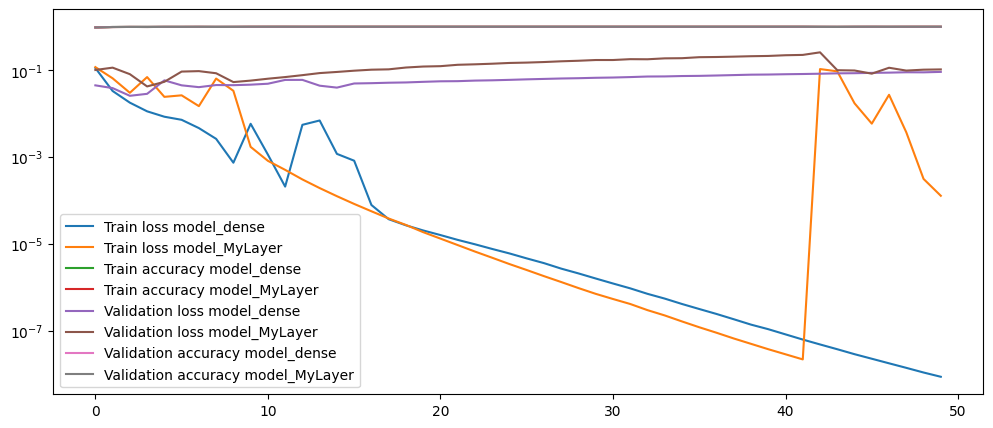

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.set_yscale('log')
ax.plot(model_dense_history.history['loss'], label='Train loss model_dense')
ax.plot(model_MyLayer_history.history['loss'], label='Train loss model_MyLayer')

ax.plot(model_dense_history.history['accuracy'], label='Train accuracy model_dense')
ax.plot(model_MyLayer_history.history['accuracy'], label='Train accuracy model_MyLayer')

ax.plot(model_dense_history.history['val_loss'], label='Validation loss model_dense')
ax.plot(model_MyLayer_history.history['val_loss'], label='Validation loss model_MyLayer')

ax.plot(model_dense_history.history['accuracy'], label='Validation accuracy model_dense')
ax.plot(model_MyLayer_history.history['accuracy'], label='Validation accuracy model_MyLayer')

ax.legend();

In [ ]:
# evaluate the model
model_dense.evaluate(x_test, y_test, verbose=0 ,  return_dict=True )

{'loss': 0.03487241640686989, 'accuracy': 0.9951790571212769}

In [ ]:
# evaluate the model
model_MyLayer.evaluate(x_test, y_test, verbose=0 ,  return_dict=True )

{'loss': 0.05296854302287102, 'accuracy': 0.9938016533851624}